In [92]:
# Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # NEW IMPORT for standardization
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib # For saving/loading models

print("Libraries imported successfully.")

Libraries imported successfully.


In [93]:
#  Load RFM Features
# Define the path to your RFM features file in the 'data' folder.
# IMPORTANT: Now loading the enhanced features file!
data_folder = '../data'
rfm_file_name = 'rfm_features_enhanced.xlsx' # Changed to load the enhanced file
rfm_file_path = os.path.join(data_folder, rfm_file_name)

print(f"Loading enhanced RFM features from: {rfm_file_path}")

# Load the RFM DataFrame
rfm_df = pd.read_excel(rfm_file_path)

print(f"Enhanced RFM features loaded. Shape: {rfm_df.shape}")
print("First 5 rows of enhanced RFM data:")
display(rfm_df.head())
print("\nEnhanced RFM Data Info:")
rfm_df.info()
print("\nDescriptive statistics of enhanced RFM data:")
display(rfm_df.describe())

Loading enhanced RFM features from: ../data\rfm_features_enhanced.xlsx
Enhanced RFM features loaded. Shape: (5878, 48)
First 5 rows of enhanced RFM data:


,Customer ID,Recency,Frequency,Monetary,AOV,Tenure,UniqueProducts,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,12346,326,12,77556.46,6463.038333,726,27,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,12347,2,8,4921.53,615.191250,404,126,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,75,5,2019.40,403.880000,438,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,19,4,4428.69,1107.172500,589,138,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,310,1,334.40,334.400000,310,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Enhanced RFM Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   5878 non-null   int64  
 1   Recency                       5878 non-null   int64  
 2   Frequency                     5878 non-null   int64  
 3   Monetary                      5878 non-null   float64
 4   AOV                           5878 non-null   float64
 5   Tenure                        5878 non-null   int64  
 6   UniqueProducts                5878 non-null   int64  
 7   Country_Australia             5878 non-null   int64  
 8   Country_Austria               5878 non-null   int64  
 9   Country_Bahrain               5878 non-null   int64  
 10  Country_Belgium               5878 non-null   int64  
 11  Country_Brazil                5878 non-null   int64  
 12  Country_Canada                5878 no

,Customer ID,Recency,Frequency,Monetary,AOV,Tenure,UniqueProducts,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
count,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,...,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000
mean,15315.313542,201.331916,6.289384,2955.904095,385.180841,474.711637,81.989112,0.002552,0.001871,0.000340,...,0.000170,0.006635,0.003232,0.003403,0.000170,0.001531,0.000681,0.910174,0.001021,0.000170
std,1715.572666,209.338707,13.009406,14440.852688,1214.286459,223.098342,116.484552,0.050456,0.043223,0.018444,...,0.013043,0.081191,0.056767,0.058237,0.013043,0.039103,0.026080,0.285957,0.031936,0.013043
min,12346.000000,1.000000,1.000000,2.950000,2.950000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13833.250000,26.000000,1.000000,342.280000,176.682500,313.000000,19.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,15314.500000,96.000000,3.000000,867.740000,279.242679,530.000000,45.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16797.750000,380.000000,7.000000,2248.305000,414.902458,668.000000,103.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,18287.000000,739.000000,398.000000,580987.040000,84236.250000,739.000000,2550.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
#  Define Target Variable (CLTV Proxy) and Features

target = 'Monetary'

# IMPORTANT: Include all the new features along with Recency and Frequency
features = [
    'Recency',
    'Frequency',
    'AOV',            # New Feature
    'Tenure',         # New Feature
    'UniqueProducts'  # New Feature
]

# Dynamically add all one-hot encoded country columns
# We need to exclude 'CustomerID', 'Monetary', 'Recency', 'Frequency', 'AOV', 'Tenure', 'UniqueProducts'
# from the columns to get the country columns.
# It's safer to get all columns that start with 'Country_'
country_features = [col for col in rfm_df.columns if col.startswith('Country_')]
features.extend(country_features)

print(f"Features selected for modeling: {features}")

X = rfm_df[features]
y = rfm_df[target]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFirst 5 rows of features (X):")
display(X.head())
print("\nFirst 5 rows of target (y):")
display(y.head())

Features selected for modeling: ['Recency', 'Frequency', 'AOV', 'Tenure', 'UniqueProducts', 'Country_Australia', 'Country_Austria', 'Country_Bahrain', 'Country_Belgium', 'Country_Brazil', 'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark', 'Country_EIRE', 'Country_European Community', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_Greece', 'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Korea', 'Country_Lebanon', 'Country_Lithuania', 'Country_Malta', 'Country_Netherlands', 'Country_Nigeria', 'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA', 'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland', 'Country_Thailand', 'Country_USA', 'Country_United Arab Emirates', 'Country_United Kingdom', 'Country_Unspecified', 'Country_West Indies']
Features (X) shape: (5878, 46)
Target (y) shape: (5878,)

First 5 rows of features (

,Recency,Frequency,AOV,Tenure,UniqueProducts,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,326,12,6463.038333,726,27,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,8,615.191250,404,126,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75,5,403.880000,438,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19,4,1107.172500,589,138,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,310,1,334.400000,310,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



First 5 rows of target (y):


0    77556.46
1     4921.53
2     2019.40
3     4428.69
4      334.40
Name: Monetary, dtype: float64

In [95]:
# Split Data into Training and Testing Sets
# Split the data into training and testing sets (e.g., 80% train, 20% test)
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Testing target (y_test) shape: {y_test.shape}")

Training features (X_train) shape: (4702, 46)
Testing features (X_test) shape: (1176, 46)
Training target (y_train) shape: (4702,)
Testing target (y_test) shape: (1176,)


In [96]:
# Standardize Features
# It's crucial to fit the scaler ONLY on the training data and then transform both
# training and testing data to prevent data leakage.

scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized successfully.")
print("\nShape of scaled training features:", X_train_scaled.shape)
print("Shape of scaled testing features:", X_test_scaled.shape)
print("First 5 rows of scaled training features (X_train_scaled):")
print(X_train_scaled[:5])

# You should also save this scaler if you plan to use the model for new, unseen data,
# as new data would also need to be scaled using the *same* scaler.
# For now, we'll proceed with saving the model, and we can discuss saving the scaler later.

Features standardized successfully.

Shape of scaled training features: (4702, 46)
Shape of scaled testing features: (1176, 46)
First 5 rows of scaled training features (X_train_scaled):
[[-0.52935108 -0.10007131 -0.08534577  0.0345183   0.08446623 -0.05265402
  -0.03574469 -0.02062842 -0.0701112  -0.02062842 -0.02917921 -0.05058296
  -0.04128321 -0.01458495 -0.03861279 -0.02526725  0.         -0.05058296
  -0.12817519 -0.12987884 -0.02917921 -0.01458495 -0.02526725 -0.05058296
  -0.04128321 -0.02062842  0.         -0.01458495 -0.02062842 -0.05843309
  -0.01458495 -0.05265402 -0.03262682 -0.05843309 -0.02062842 -0.01458495
  -0.01458495 -0.0801326  -0.05657156 -0.05657156 -0.01458495 -0.03861279
  -0.02526725  0.30989885 -0.03262682 -0.01458495]
 [-0.83111704 -0.32563951 -0.04928679 -1.8222295  -0.42862804 -0.05265402
  -0.03574469 -0.02062842 -0.0701112  -0.02062842 -0.02917921 -0.05058296
  -0.04128321 -0.01458495 -0.03861279 -0.02526725  0.         -0.05058296
  -0.12817519 -0.12987

## Train and Evaluate Linear Regression Model

--- Training Linear Regression Model ---

Linear Regression Metrics:
  MAE: 1810.08
  RMSE: 14379.91
  R-squared: 0.43


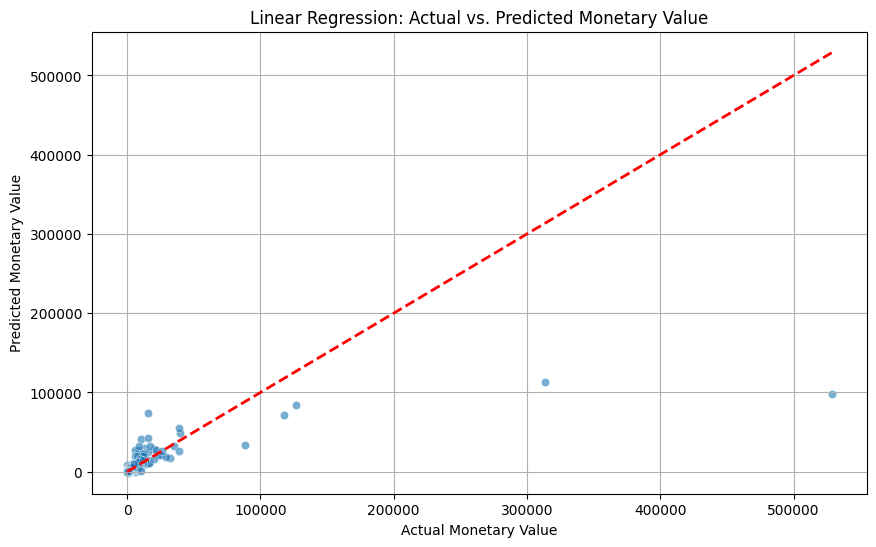

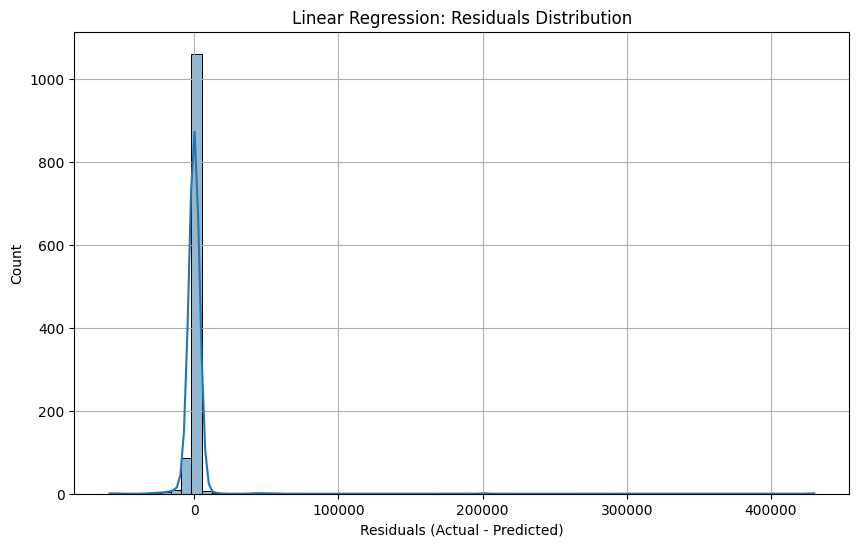

In [97]:
# Train and Evaluate Linear Regression Model

print("--- Training Linear Regression Model ---")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train) # Use scaled data here

y_pred_lr = lr_model.predict(X_test_scaled) # Use scaled data here

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nLinear Regression Metrics:")
print(f"  MAE: {mae_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R-squared: {r2_lr:.2f}")

# Visualization for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.title('Linear Regression: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_lr, kde=True)
plt.title('Linear Regression: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Train and Evaluate Random Forest Regressor Model


--- Training Random Forest Regressor Model ---

Random Forest Regressor Metrics:
  MAE: 364.65
  RMSE: 4928.40
  R-squared: 0.93


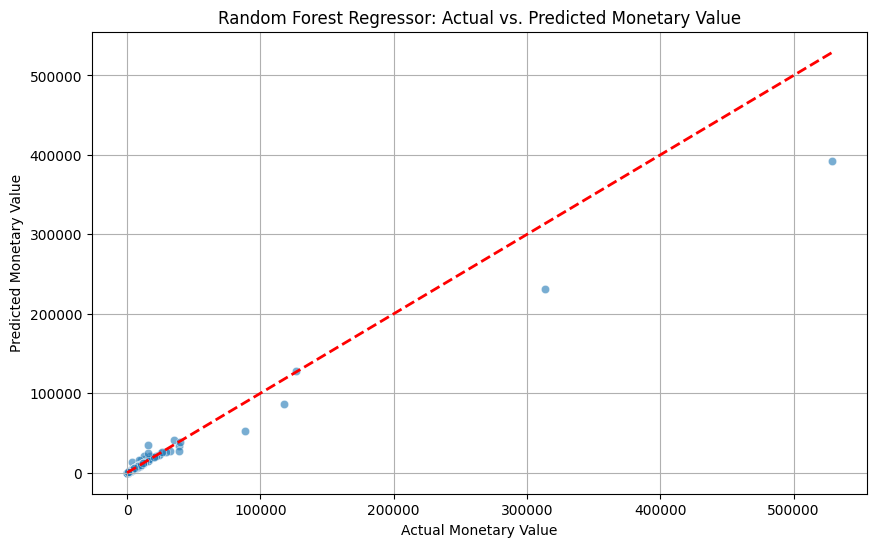

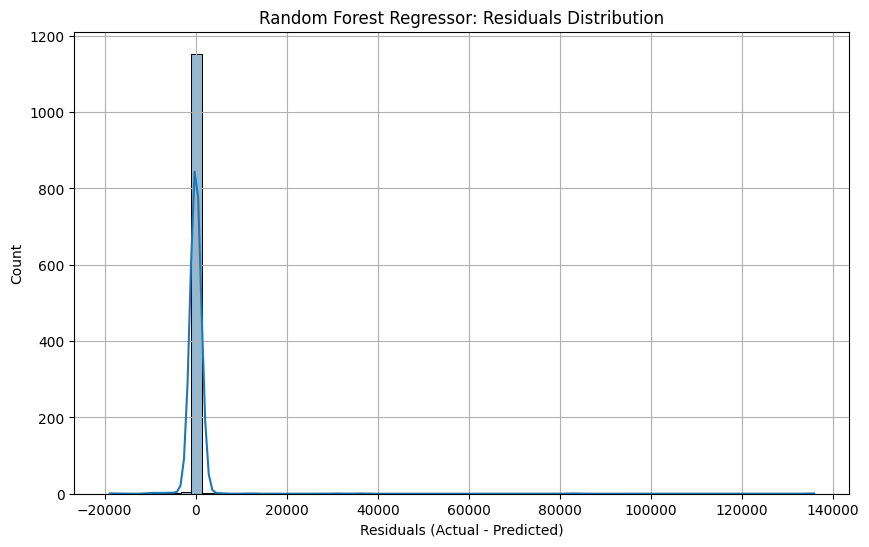

C:\Users\aman2\AppData\Local\Temp\ipykernel_17072\1056329954.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')


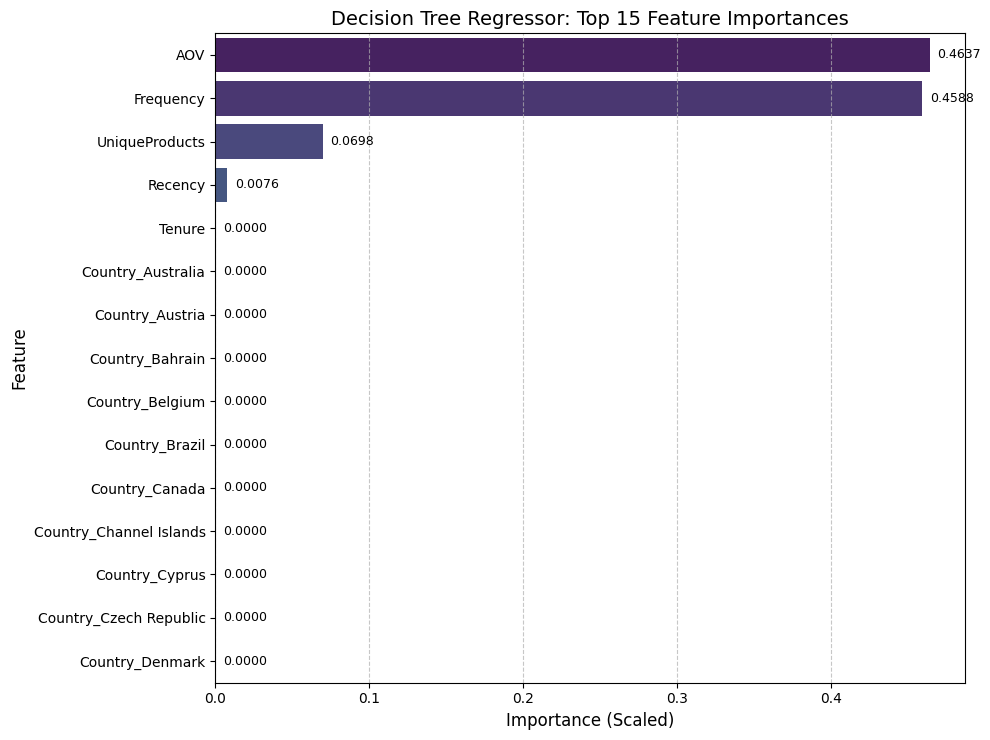


Full Decision Tree Feature Importances (sorted):
AOV                             0.463728
Frequency                       0.458787
UniqueProducts                  0.069837
Recency                         0.007648
Tenure                          0.000000
Country_Australia               0.000000
Country_Austria                 0.000000
Country_Bahrain                 0.000000
Country_Belgium                 0.000000
Country_Brazil                  0.000000
Country_Canada                  0.000000
Country_Channel Islands         0.000000
Country_Cyprus                  0.000000
Country_Czech Republic          0.000000
Country_Denmark                 0.000000
Country_EIRE                    0.000000
Country_European Community      0.000000
Country_Finland                 0.000000
Country_France                  0.000000
Country_Germany                 0.000000
Country_Greece                  0.000000
Country_Iceland                 0.000000
Country_Israel                  0.000000
Country

In [98]:
# Train and Evaluate Random Forest Regressor Model

print("\n--- Training Random Forest Regressor Model ---")
# You can tune hyperparameters (e.g., n_estimators, max_depth) for better performance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train) # Use scaled data here

y_pred_rf = rf_model.predict(X_test_scaled) # Use scaled data here

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor Metrics:")
print(f"  MAE: {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R-squared: {r2_rf:.2f}")

# Visualization for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.title('Random Forest Regressor: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_rf, kde=True)
plt.title('Random Forest Regressor: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Feature Importance for Decision Tree
if hasattr(dt_model, 'feature_importances_'):
    feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Define how many top features to display
    top_n_features = 15 # You can adjust this number

    # Filter for top N features
    top_features_to_plot = feature_importances_dt.head(top_n_features)

    plt.figure(figsize=(10, max(6, top_n_features * 0.5))) # Adjust figure size dynamically
    sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')
    plt.title(f'Decision Tree Regressor: Top {top_n_features} Feature Importances', fontsize=14)
    plt.xlabel('Importance (Scaled)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Add importance values on the bars for clarity
    for index, value in enumerate(top_features_to_plot.values):
        plt.text(value + 0.005, index, f'{value:.4f}', va='center', ha='left', fontsize=9)

    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    # Also display full feature importances in text for detailed inspection
    print(f"\nFull Decision Tree Feature Importances (sorted):\n{feature_importances_dt}")

##  Train and Evaluate Gradient Boosting Regressor Model


--- Training Gradient Boosting Regressor Model ---

Gradient Boosting Regressor Metrics:
  MAE: 395.45
  RMSE: 2736.65
  R-squared: 0.98


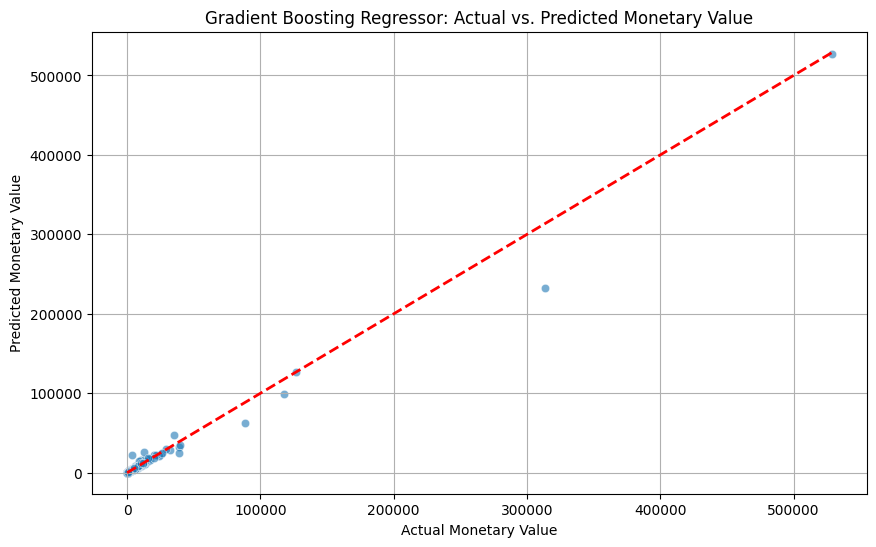

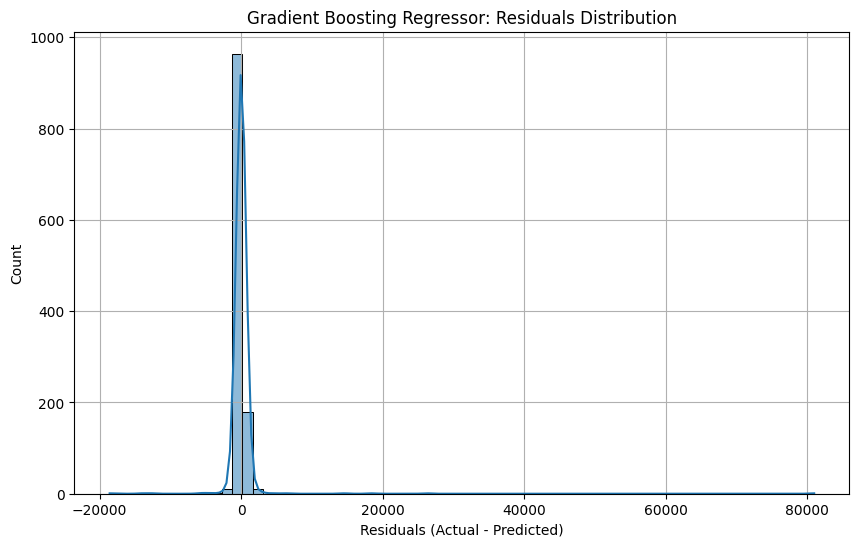

C:\Users\aman2\AppData\Local\Temp\ipykernel_17072\2548498362.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')


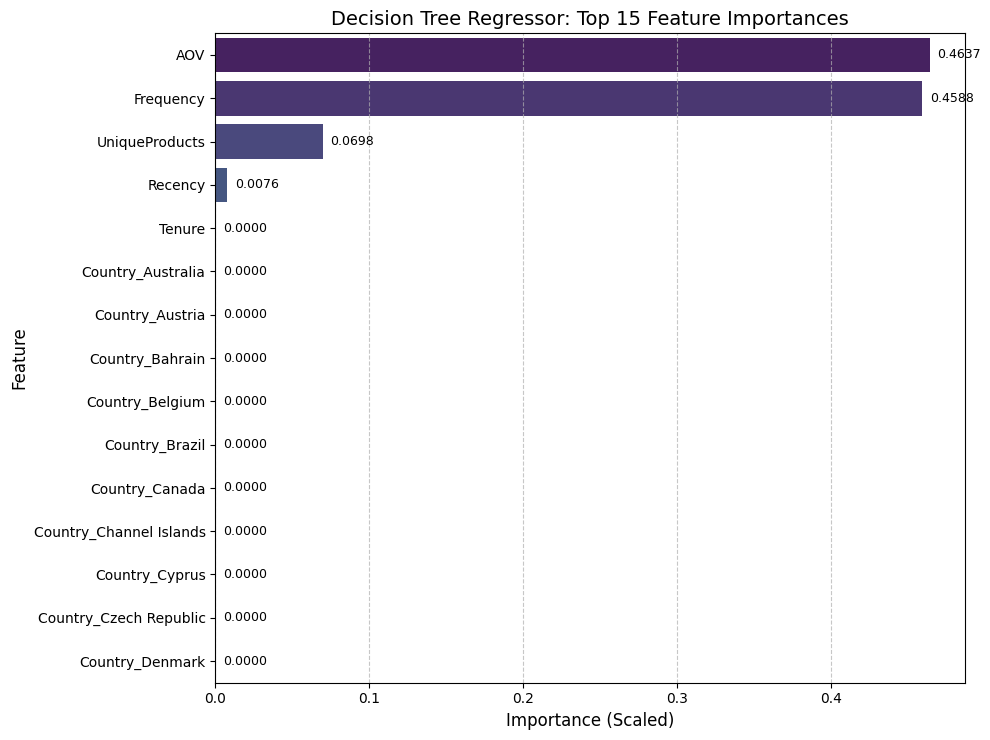


Full Decision Tree Feature Importances (sorted):
AOV                             0.463728
Frequency                       0.458787
UniqueProducts                  0.069837
Recency                         0.007648
Tenure                          0.000000
Country_Australia               0.000000
Country_Austria                 0.000000
Country_Bahrain                 0.000000
Country_Belgium                 0.000000
Country_Brazil                  0.000000
Country_Canada                  0.000000
Country_Channel Islands         0.000000
Country_Cyprus                  0.000000
Country_Czech Republic          0.000000
Country_Denmark                 0.000000
Country_EIRE                    0.000000
Country_European Community      0.000000
Country_Finland                 0.000000
Country_France                  0.000000
Country_Germany                 0.000000
Country_Greece                  0.000000
Country_Iceland                 0.000000
Country_Israel                  0.000000
Country

In [99]:
# Train and Evaluate Gradient Boosting Regressor Model

print("\n--- Training Gradient Boosting Regressor Model ---")
# You can tune hyperparameters for better performance
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train) # Use scaled data here

y_pred_gb = gb_model.predict(X_test_scaled) # Use scaled data here

# Evaluate Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"\nGradient Boosting Regressor Metrics:")
print(f"  MAE: {mae_gb:.2f}")
print(f"  RMSE: {rmse_gb:.2f}")
print(f"  R-squared: {r2_gb:.2f}")

# Visualization for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.title('Gradient Boosting Regressor: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_gb, kde=True)
plt.title('Gradient Boosting Regressor: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Feature Importance for Decision Tree
if hasattr(dt_model, 'feature_importances_'):
    feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Define how many top features to display
    top_n_features = 15 # You can adjust this number

    # Filter for top N features
    top_features_to_plot = feature_importances_dt.head(top_n_features)

    plt.figure(figsize=(10, max(6, top_n_features * 0.5))) # Adjust figure size dynamically
    sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')
    plt.title(f'Decision Tree Regressor: Top {top_n_features} Feature Importances', fontsize=14)
    plt.xlabel('Importance (Scaled)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Add importance values on the bars for clarity
    for index, value in enumerate(top_features_to_plot.values):
        plt.text(value + 0.005, index, f'{value:.4f}', va='center', ha='left', fontsize=9)

    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    # Also display full feature importances in text for detailed inspection
    print(f"\nFull Decision Tree Feature Importances (sorted):\n{feature_importances_dt}")

In [100]:
# Compare Models and Select the Best One

# Create a DataFrame to summarize model performance
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_rf, mae_gb],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb],
    'R-squared': [r2_lr, r2_rf, r2_gb]
})

print("--- Model Performance Comparison ---")
display(model_performance.sort_values(by='RMSE', ascending=True)) # Sort by RMSE (lower is better)

# You can choose the "best" model based on your primary metric (e.g., lowest RMSE or MAE, highest R2)
# For CLTV, MAE is often preferred because it's directly interpretable in monetary terms.
best_model_name = model_performance.sort_values(by='MAE', ascending=True).iloc[0]['Model']
print(f"\nBased on MAE, the best performing model is: {best_model_name}")

# Assign the best model object
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
else: # Gradient Boosting
    best_model = gb_model

print(f"Selected best model object: {best_model.__class__.__name__}")

--- Model Performance Comparison ---


,Model,MAE,RMSE,R-squared
2,Gradient Boosting,395.446744,2736.653174,0.979376
1,Random Forest,364.650210,4928.395194,0.933112
0,Linear Regression,1810.075508,14379.906693,0.430559



Based on MAE, the best performing model is: Random Forest
Selected best model object: RandomForestRegressor


In [101]:
! pip install lightgbm


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
# NEW IMPORTS for advanced boosting models
import xgboost as xgb # For XGBoost
import lightgbm as lgb # For LightGBM

##  Train and Evaluate XGBoost Regressor Model


--- Training XGBoost Regressor Model ---

XGBoost Regressor Metrics:
  MAE: 319.79
  RMSE: 2787.71
  R-squared: 0.9786


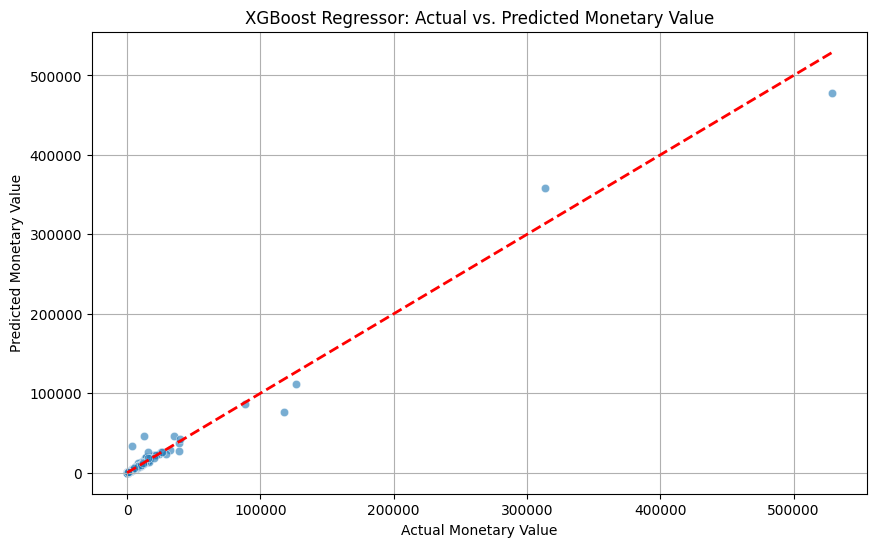

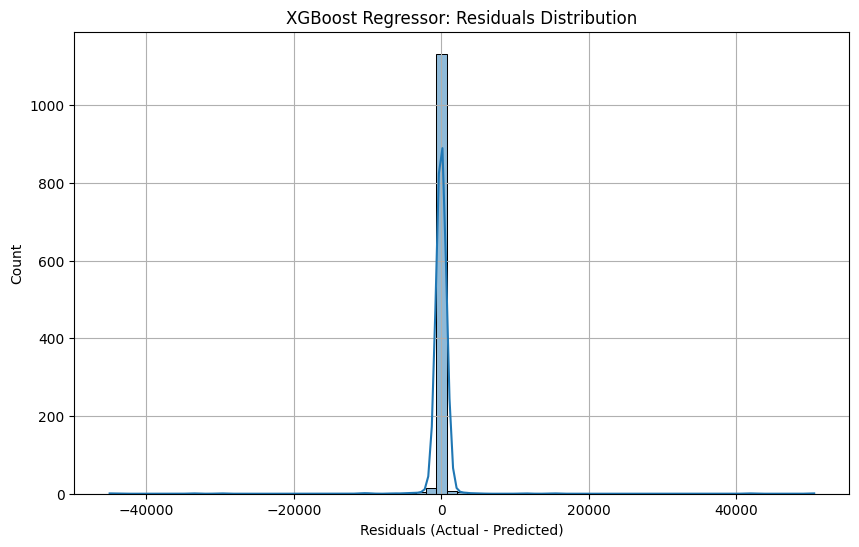

C:\Users\aman2\AppData\Local\Temp\ipykernel_17072\3635719783.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')


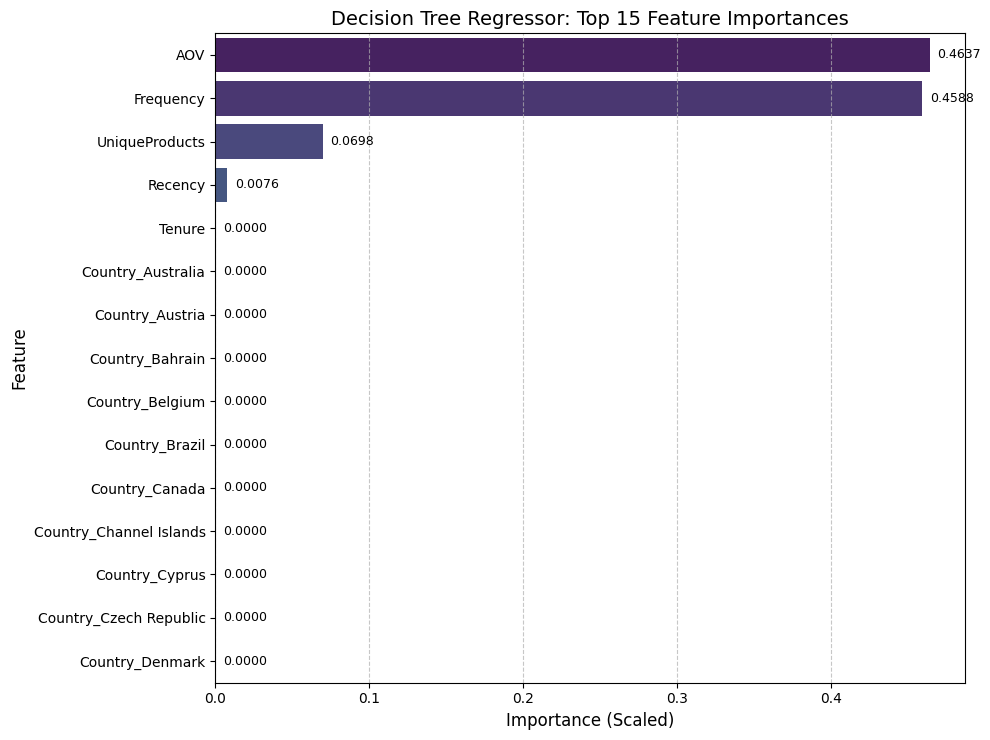


Full Decision Tree Feature Importances (sorted):
AOV                             0.463728
Frequency                       0.458787
UniqueProducts                  0.069837
Recency                         0.007648
Tenure                          0.000000
Country_Australia               0.000000
Country_Austria                 0.000000
Country_Bahrain                 0.000000
Country_Belgium                 0.000000
Country_Brazil                  0.000000
Country_Canada                  0.000000
Country_Channel Islands         0.000000
Country_Cyprus                  0.000000
Country_Czech Republic          0.000000
Country_Denmark                 0.000000
Country_EIRE                    0.000000
Country_European Community      0.000000
Country_Finland                 0.000000
Country_France                  0.000000
Country_Germany                 0.000000
Country_Greece                  0.000000
Country_Iceland                 0.000000
Country_Israel                  0.000000
Country

In [103]:
# Train and Evaluate XGBoost Regressor Model

print("\n--- Training XGBoost Regressor Model ---")
# XGBoost is highly configurable. Starting with sensible defaults.
# You might need to tune parameters like n_estimators, learning_rate, max_depth for optimal results.
xgb_model = xgb.XGBRegressor()
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # For regression tasks
#                              n_estimators=100,
#                              learning_rate=0.1,
#                              random_state=42)
xgb_model.fit(X_train_scaled, y_train) # Use scaled data here

y_pred_xgb = xgb_model.predict(X_test_scaled) # Use scaled data here

# Evaluate XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost Regressor Metrics:")
print(f"  MAE: {mae_xgb:.2f}")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  R-squared: {r2_xgb:.4f}") # Increased precision for R-squared

# Visualization for XGBoost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.title('XGBoost Regressor: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_xgb, kde=True)
plt.title('XGBoost Regressor: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Feature Importance for Decision Tree
if hasattr(dt_model, 'feature_importances_'):
    feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Define how many top features to display
    top_n_features = 15 # You can adjust this number

    # Filter for top N features
    top_features_to_plot = feature_importances_dt.head(top_n_features)

    plt.figure(figsize=(10, max(6, top_n_features * 0.5))) # Adjust figure size dynamically
    sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')
    plt.title(f'Decision Tree Regressor: Top {top_n_features} Feature Importances', fontsize=14)
    plt.xlabel('Importance (Scaled)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Add importance values on the bars for clarity
    for index, value in enumerate(top_features_to_plot.values):
        plt.text(value + 0.005, index, f'{value:.4f}', va='center', ha='left', fontsize=9)

    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    # Also display full feature importances in text for detailed inspection
    print(f"\nFull Decision Tree Feature Importances (sorted):\n{feature_importances_dt}")

## Train and Evaluate LightGBM Regressor Model


--- Training LightGBM Regressor Model ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 10
[LightGBM] [Info] Start training from score 2936.051798



LightGBM Regressor Metrics:
  MAE: 924.65
  RMSE: 11990.92
  R-squared: 0.6040


c:\Users\aman2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


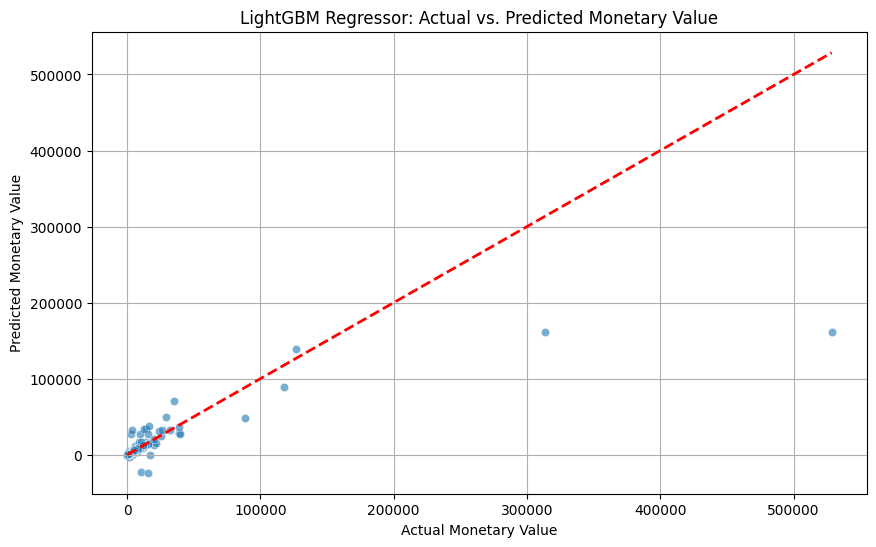

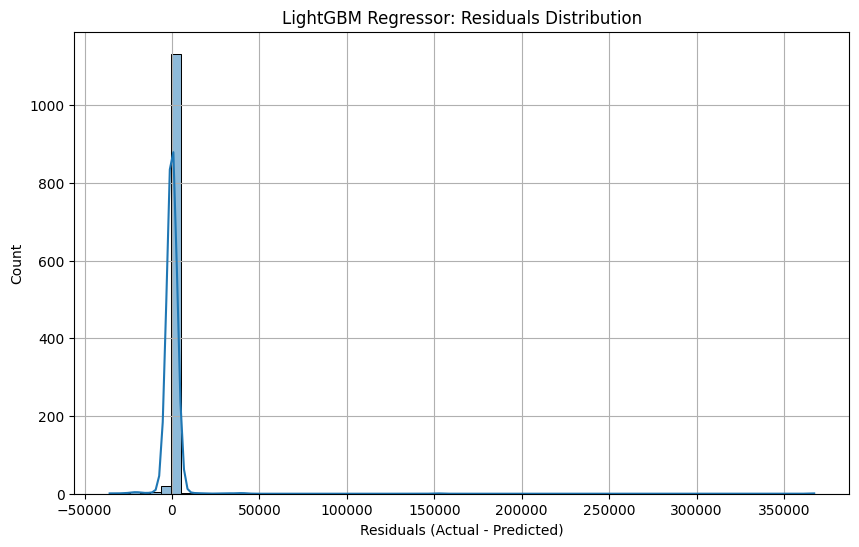

C:\Users\aman2\AppData\Local\Temp\ipykernel_17072\3735347492.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')


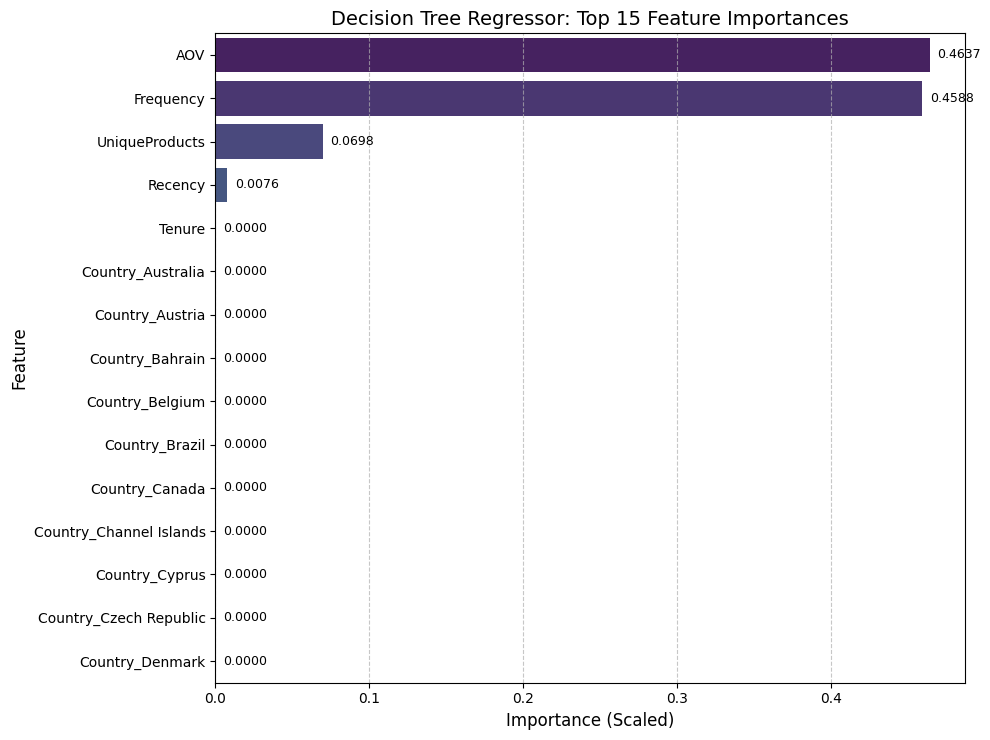


Full Decision Tree Feature Importances (sorted):
AOV                             0.463728
Frequency                       0.458787
UniqueProducts                  0.069837
Recency                         0.007648
Tenure                          0.000000
Country_Australia               0.000000
Country_Austria                 0.000000
Country_Bahrain                 0.000000
Country_Belgium                 0.000000
Country_Brazil                  0.000000
Country_Canada                  0.000000
Country_Channel Islands         0.000000
Country_Cyprus                  0.000000
Country_Czech Republic          0.000000
Country_Denmark                 0.000000
Country_EIRE                    0.000000
Country_European Community      0.000000
Country_Finland                 0.000000
Country_France                  0.000000
Country_Germany                 0.000000
Country_Greece                  0.000000
Country_Iceland                 0.000000
Country_Israel                  0.000000
Country

In [104]:
# Train and Evaluate LightGBM Regressor Model

print("\n--- Training LightGBM Regressor Model ---")
# LightGBM is highly configurable. Starting with sensible defaults.
# You might need to tune parameters like n_estimators, learning_rate, num_leaves for optimal results.
lgb_model = lgb.LGBMRegressor(objective='regression', # For regression tasks
                              n_estimators=100,
                              learning_rate=0.1,
                              random_state=42)
lgb_model.fit(X_train_scaled, y_train) # Use scaled data here

y_pred_lgb = lgb_model.predict(X_test_scaled) # Use scaled data here

# Evaluate LightGBM
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"\nLightGBM Regressor Metrics:")
print(f"  MAE: {mae_lgb:.2f}")
print(f"  RMSE: {rmse_lgb:.2f}")
print(f"  R-squared: {r2_lgb:.4f}") # Increased precision for R-squared

# Visualization for LightGBM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.title('LightGBM Regressor: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_lgb, kde=True)
plt.title('LightGBM Regressor: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Feature Importance for Decision Tree
if hasattr(dt_model, 'feature_importances_'):
    feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Define how many top features to display
    top_n_features = 15 # You can adjust this number

    # Filter for top N features
    top_features_to_plot = feature_importances_dt.head(top_n_features)

    plt.figure(figsize=(10, max(6, top_n_features * 0.5))) # Adjust figure size dynamically
    sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')
    plt.title(f'Decision Tree Regressor: Top {top_n_features} Feature Importances', fontsize=14)
    plt.xlabel('Importance (Scaled)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Add importance values on the bars for clarity
    for index, value in enumerate(top_features_to_plot.values):
        plt.text(value + 0.005, index, f'{value:.4f}', va='center', ha='left', fontsize=9)

    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    # Also display full feature importances in text for detailed inspection
    print(f"\nFull Decision Tree Feature Importances (sorted):\n{feature_importances_dt}")

In [105]:
# Compare Models and Select the Best One

# Create a DataFrame to summarize model performance
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting (sklearn)', 'XGBoost', 'LightGBM'],
    'MAE': [mae_lr, mae_rf, mae_gb, mae_xgb, mae_lgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb, rmse_xgb, rmse_lgb],
    'R-squared': [r2_lr, r2_rf, r2_gb, r2_xgb, r2_lgb]
})

print("--- Model Performance Comparison ---")
display(model_performance.sort_values(by='RMSE', ascending=True)) # Sort by RMSE (lower is better)

# You can choose the "best" model based on your primary metric (e.g., lowest RMSE or MAE, highest R2)
# For CLTV, MAE is often preferred because it's directly interpretable in monetary terms.
best_model_name = model_performance.sort_values(by='MAE', ascending=True).iloc[0]['Model']
print(f"\nBased on MAE, the best performing model is: {best_model_name}")

# Assign the best model object
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'Gradient Boosting (sklearn)':
    best_model = gb_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model
else: # LightGBM
    best_model = lgb_model

print(f"Selected best model object: {best_model.__class__.__name__}")

--- Model Performance Comparison ---


,Model,MAE,RMSE,R-squared
2,Gradient Boosting (sklearn),395.446744,2736.653174,0.979376
3,XGBoost,319.790961,2787.711424,0.978599
1,Random Forest,364.650210,4928.395194,0.933112
4,LightGBM,924.645305,11990.916523,0.604049
0,Linear Regression,1810.075508,14379.906693,0.430559



Based on MAE, the best performing model is: XGBoost
Selected best model object: XGBRegressor


In [106]:
#  Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib # For saving/loading models

# Imports for advanced boosting models
import xgboost as xgb
import lightgbm as lgb

# NEW IMPORTS for SVR, KNR, and Decision Tree
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

print("Libraries imported successfully.")

Libraries imported successfully.


## Train and Evaluate Support Vector Regressor (SVR) Model (NEW CELL)


--- Training Support Vector Regressor (SVR) Model ---

SVR Regressor Metrics:
  MAE: 1893.71
  RMSE: 18828.58
  R-squared: 0.0237


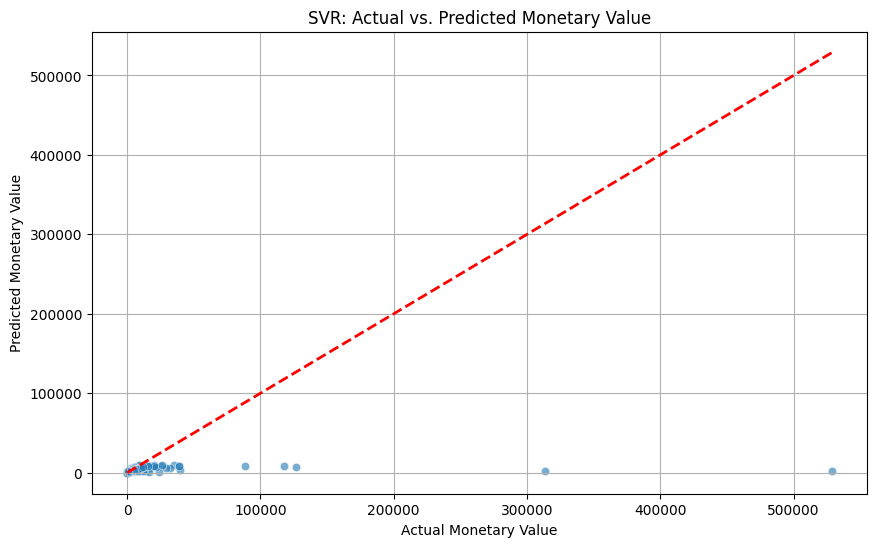

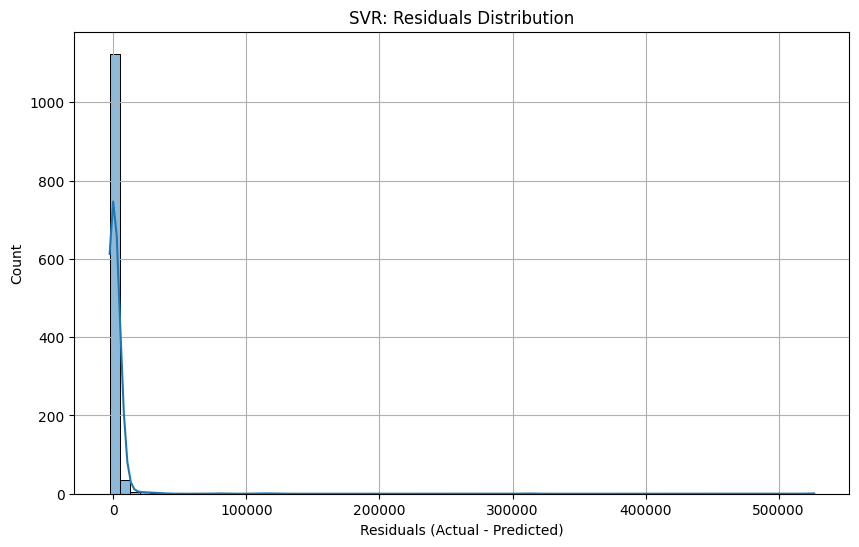

In [107]:
# Train and Evaluate Support Vector Regressor (SVR) Model

print("\n--- Training Support Vector Regressor (SVR) Model ---")
# SVR can be computationally intensive on large datasets.
# You might need to adjust C and epsilon for optimal results.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1) # Radial Basis Function kernel is common
svr_model.fit(X_train_scaled, y_train) # SVR is highly sensitive to scaling, use scaled data

y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"\nSVR Regressor Metrics:")
print(f"  MAE: {mae_svr:.2f}")
print(f"  RMSE: {rmse_svr:.2f}")
print(f"  R-squared: {r2_svr:.4f}")

# Visualization for SVR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.title('SVR: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_svr, kde=True)
plt.title('SVR: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

##  Train and Evaluate K-Nearest Neighbors Regressor (KNR) Model


--- Training K-Nearest Neighbors Regressor (KNR) Model ---

KNR Regressor Metrics:
  MAE: 1486.18
  RMSE: 16903.08
  R-squared: 0.2132


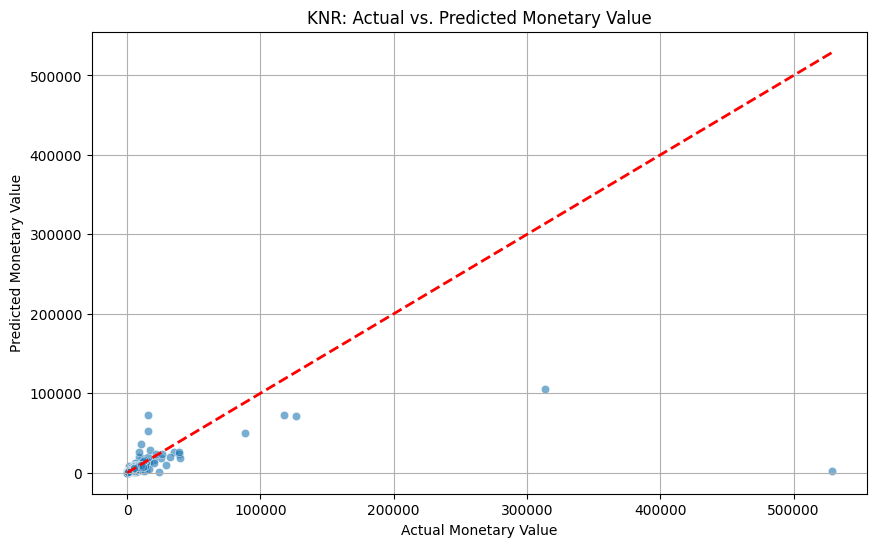

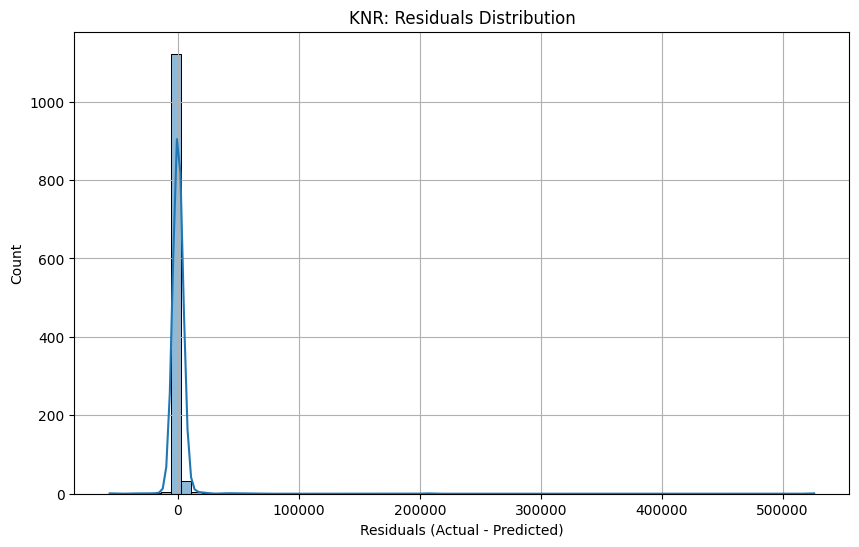

In [108]:
#  Train and Evaluate K-Nearest Neighbors Regressor (KNR) Model

print("\n--- Training K-Nearest Neighbors Regressor (KNR) Model ---")
# n_neighbors is a key parameter. A common starting point is 5 or more.
knr_model = KNeighborsRegressor(n_neighbors=5)
knr_model.fit(X_train_scaled, y_train) # KNR is highly sensitive to scaling, use scaled data

y_pred_knr = knr_model.predict(X_test_scaled)

# Evaluate KNR
mae_knr = mean_absolute_error(y_test, y_pred_knr)
rmse_knr = np.sqrt(mean_squared_error(y_test, y_pred_knr))
r2_knr = r2_score(y_test, y_pred_knr)

print(f"\nKNR Regressor Metrics:")
print(f"  MAE: {mae_knr:.2f}")
print(f"  RMSE: {rmse_knr:.2f}")
print(f"  R-squared: {r2_knr:.4f}")

# Visualization for KNR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_knr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.title('KNR: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_knr, kde=True)
plt.title('KNR: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Train and Evaluate Decision Tree Regressor Model


--- Training Decision Tree Regressor Model ---

Decision Tree Regressor Metrics:
  MAE: 1441.59
  RMSE: 7355.18
  R-squared: 0.8510


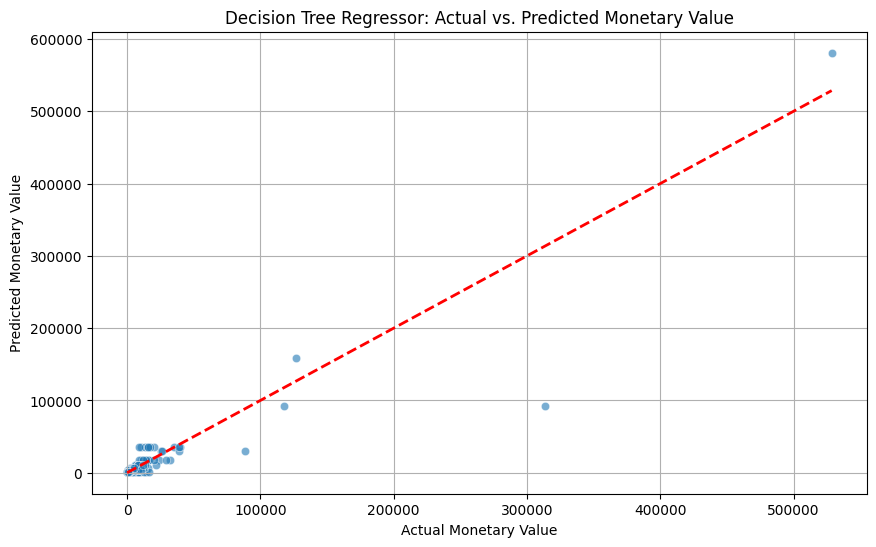

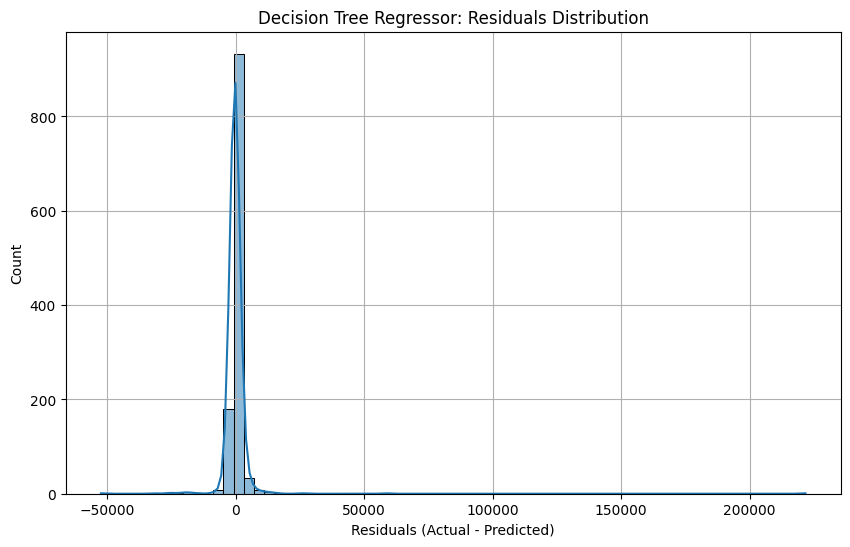

C:\Users\aman2\AppData\Local\Temp\ipykernel_17072\2653661683.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')


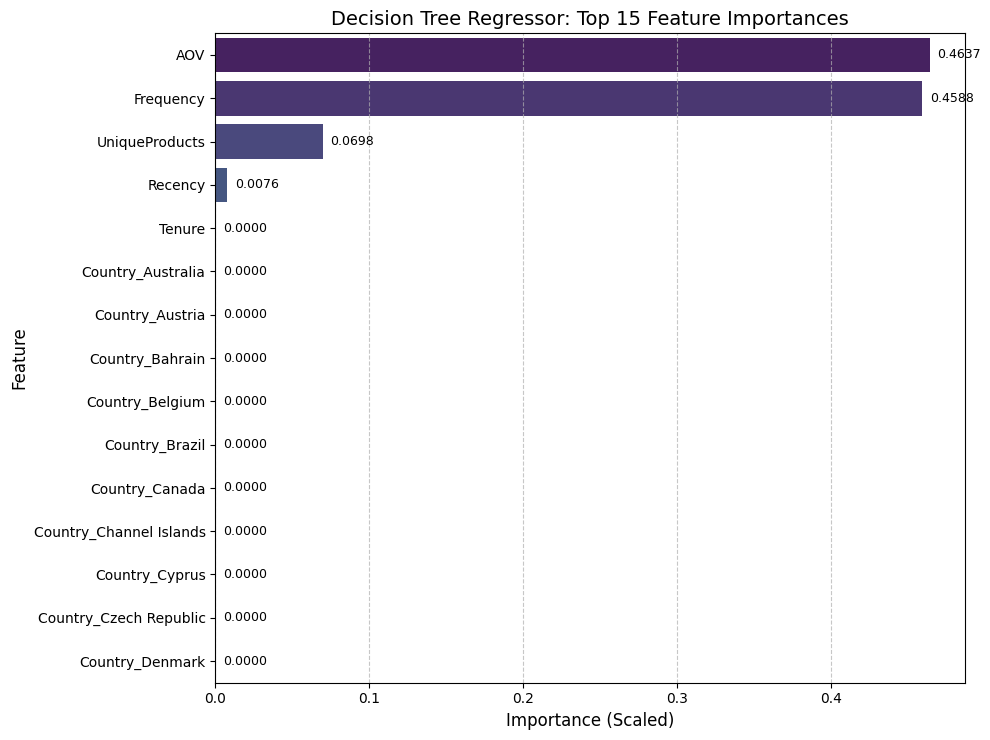


Full Decision Tree Feature Importances (sorted):
AOV                             0.463728
Frequency                       0.458787
UniqueProducts                  0.069837
Recency                         0.007648
Tenure                          0.000000
Country_Australia               0.000000
Country_Austria                 0.000000
Country_Bahrain                 0.000000
Country_Belgium                 0.000000
Country_Brazil                  0.000000
Country_Canada                  0.000000
Country_Channel Islands         0.000000
Country_Cyprus                  0.000000
Country_Czech Republic          0.000000
Country_Denmark                 0.000000
Country_EIRE                    0.000000
Country_European Community      0.000000
Country_Finland                 0.000000
Country_France                  0.000000
Country_Germany                 0.000000
Country_Greece                  0.000000
Country_Iceland                 0.000000
Country_Israel                  0.000000
Country

In [109]:
# Train and Evaluate Decision Tree Regressor Model

print("\n--- Training Decision Tree Regressor Model ---")
# Decision Trees can easily overfit. max_depth is a key parameter for controlling complexity.
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5) # Limit depth to prevent overfitting
dt_model.fit(X_train_scaled, y_train) # Scaling isn't strictly necessary for DT, but won't hurt

y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\nDecision Tree Regressor Metrics:")
print(f"  MAE: {mae_dt:.2f}")
print(f"  RMSE: {rmse_dt:.2f}")
print(f"  R-squared: {r2_dt:.4f}")

# Visualization for Decision Tree
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.title('Decision Tree Regressor: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_dt, kde=True)
plt.title('Decision Tree Regressor: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Feature Importance for Decision Tree
if hasattr(dt_model, 'feature_importances_'):
    feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Define how many top features to display
    top_n_features = 15 # You can adjust this number

    # Filter for top N features
    top_features_to_plot = feature_importances_dt.head(top_n_features)

    plt.figure(figsize=(10, max(6, top_n_features * 0.5))) # Adjust figure size dynamically
    sns.barplot(x=top_features_to_plot.values, y=top_features_to_plot.index, palette='viridis')
    plt.title(f'Decision Tree Regressor: Top {top_n_features} Feature Importances', fontsize=14)
    plt.xlabel('Importance (Scaled)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Add importance values on the bars for clarity
    for index, value in enumerate(top_features_to_plot.values):
        plt.text(value + 0.005, index, f'{value:.4f}', va='center', ha='left', fontsize=9)

    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    # Also display full feature importances in text for detailed inspection
    print(f"\nFull Decision Tree Feature Importances (sorted):\n{feature_importances_dt}")

In [110]:
# Compare Models and Select the Best One

# Create a DataFrame to summarize model performance
model_performance = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Gradient Boosting (sklearn)',
        'XGBoost',
        'LightGBM',
        'SVR',               # New
        'K-Nearest Neighbors', # New
        'Decision Tree'      # New
    ],
    'MAE': [
        mae_lr, mae_rf, mae_gb, mae_xgb, mae_lgb,
        mae_svr, mae_knr, mae_dt
    ],
    'RMSE': [
        rmse_lr, rmse_rf, rmse_gb, rmse_xgb, rmse_lgb,
        rmse_svr, rmse_knr, rmse_dt
    ],
    'R-squared': [
        r2_lr, r2_rf, r2_gb, r2_xgb, r2_lgb,
        r2_svr, r2_knr, r2_dt
    ]
})

print("--- Model Performance Comparison ---")
display(model_performance.sort_values(by='RMSE', ascending=True)) # Sort by RMSE (lower is better)

# Choose the "best" model based on your primary metric (e.g., lowest RMSE or MAE, highest R2)
# For CLTV, MAE is often preferred because it's directly interpretable in monetary terms.
best_model_name = model_performance.sort_values(by='MAE', ascending=True).iloc[0]['Model']
print(f"\nBased on MAE, the best performing model is: {best_model_name}")

# Assign the best model object
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'Gradient Boosting (sklearn)':
    best_model = gb_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model
elif best_model_name == 'LightGBM':
    best_model = lgb_model
elif best_model_name == 'SVR':
    best_model = svr_model
elif best_model_name == 'K-Nearest Neighbors':
    best_model = knr_model
else: # Decision Tree
    best_model = dt_model

print(f"Selected best model object: {best_model.__class__.__name__}")

--- Model Performance Comparison ---


,Model,MAE,RMSE,R-squared
2,Gradient Boosting (sklearn),395.446744,2736.653174,0.979376
3,XGBoost,319.790961,2787.711424,0.978599
1,Random Forest,364.650210,4928.395194,0.933112
7,Decision Tree,1441.589225,7355.175358,0.851022
4,LightGBM,924.645305,11990.916523,0.604049
0,Linear Regression,1810.075508,14379.906693,0.430559
6,K-Nearest Neighbors,1486.178218,16903.081669,0.213193
5,SVR,1893.708516,18828.575879,0.023726



Based on MAE, the best performing model is: XGBoost
Selected best model object: XGBRegressor


In [111]:
#  Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib # For saving/loading models

# Imports for advanced boosting models
import xgboost as xgb
import lightgbm as lgb

# Imports for SVR, KNR, and Decision Tree
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# NEW IMPORTS for additional models
from sklearn.ensemble import HistGradientBoostingRegressor # Fast Gradient Boosting
from sklearn.neural_network import MLPRegressor # Multi-layer Perceptron (Neural Network)
from sklearn.linear_model import BayesianRidge # Bayesian Linear Model

print("Libraries imported successfully.")

Libraries imported successfully.


## Train and Evaluate HistGradientBoostingRegressor Model


--- Training HistGradientBoostingRegressor Model ---



HistGradientBoostingRegressor Metrics:
  MAE: 863.74
  RMSE: 11698.45
  R-squared: 0.6231


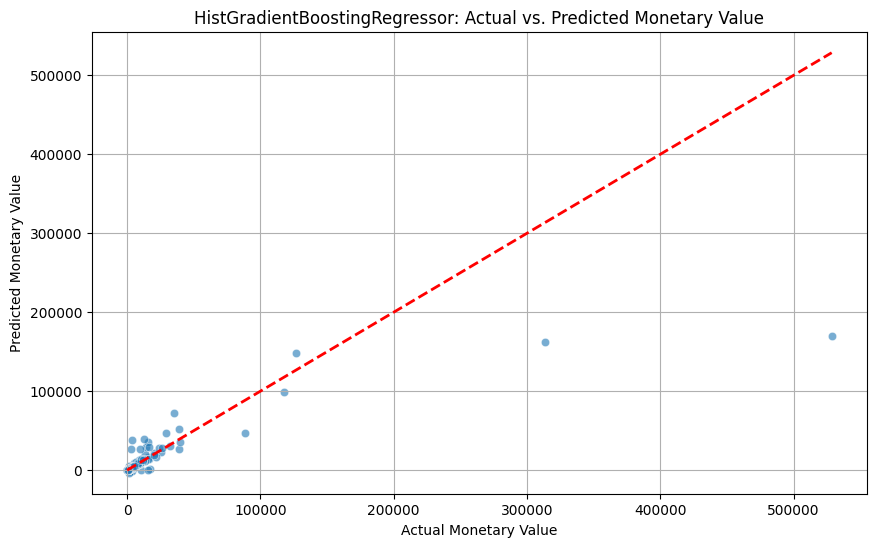

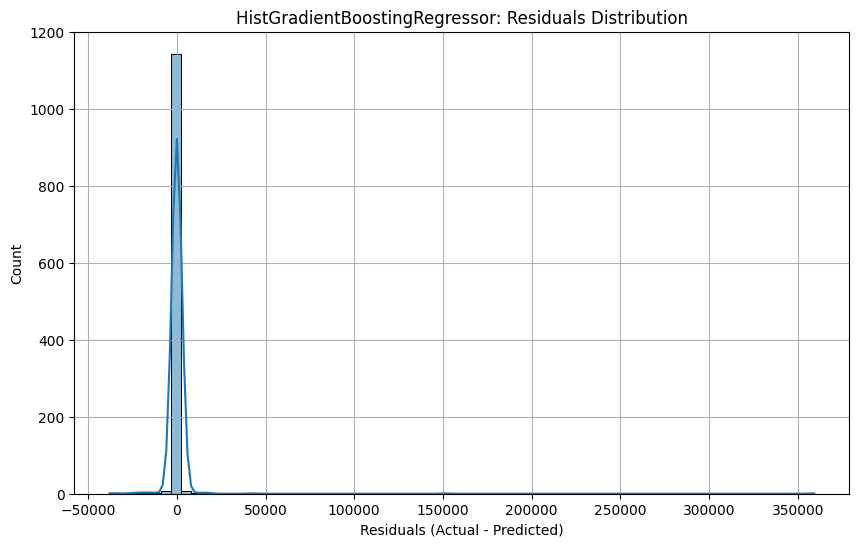

Feature importances for HistGradientBoostingRegressor are not directly available via .feature_importances_ attribute.


In [112]:
# Train and Evaluate HistGradientBoostingRegressor Model

print("\n--- Training HistGradientBoostingRegressor Model ---")
# HistGradientBoostingRegressor is optimized for large datasets and often performs well.
# It automatically handles missing values (NaNs) internally, but we've already imputed them.
hgb_model = HistGradientBoostingRegressor() # Sensible defaults, can tune n_estimators, max_leaf_nodes
hgb_model.fit(X_train_scaled, y_train)

y_pred_hgb = hgb_model.predict(X_test_scaled)

# Evaluate HistGradientBoostingRegressor
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
r2_hgb = r2_score(y_test, y_pred_hgb)

print(f"\nHistGradientBoostingRegressor Metrics:")
print(f"  MAE: {mae_hgb:.2f}")
print(f"  RMSE: {rmse_hgb:.2f}")
print(f"  R-squared: {r2_hgb:.4f}")

# Visualization for HistGradientBoostingRegressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_hgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('HistGradientBoostingRegressor: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_hgb, kde=True)
plt.title('HistGradientBoostingRegressor: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# HistGradientBoostingRegressor also has feature importances, but handled differently (gain-based for trees)
# Not directly accessible via .feature_importances_ like other tree models in sklearn for this estimator.
# You could use sklearn.inspection.permutation_importance if needed.
print("Feature importances for HistGradientBoostingRegressor are not directly available via .feature_importances_ attribute.")

## Train and Evaluate MLPRegressor Model (Neural Network)


--- Training MLPRegressor (Neural Network) Model ---

MLPRegressor Metrics:
  MAE: 1584.39
  RMSE: 15159.80
  R-squared: 0.3671


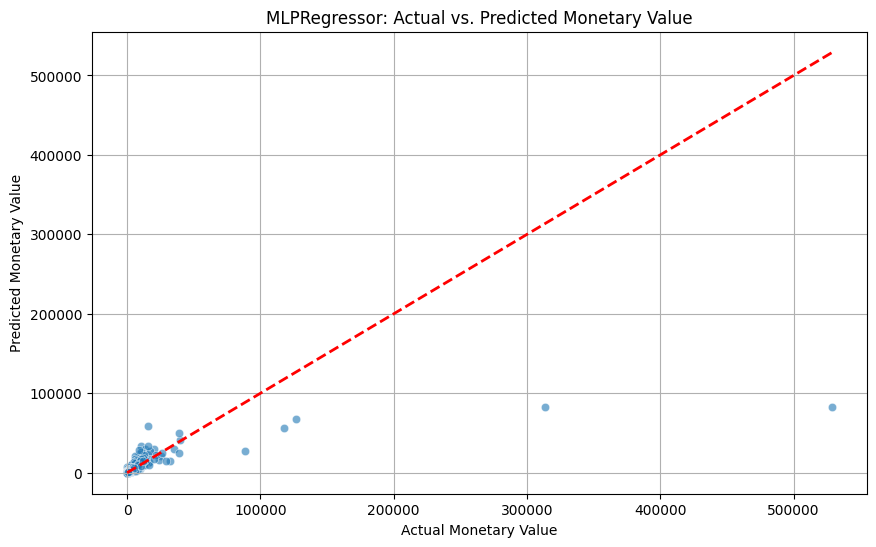

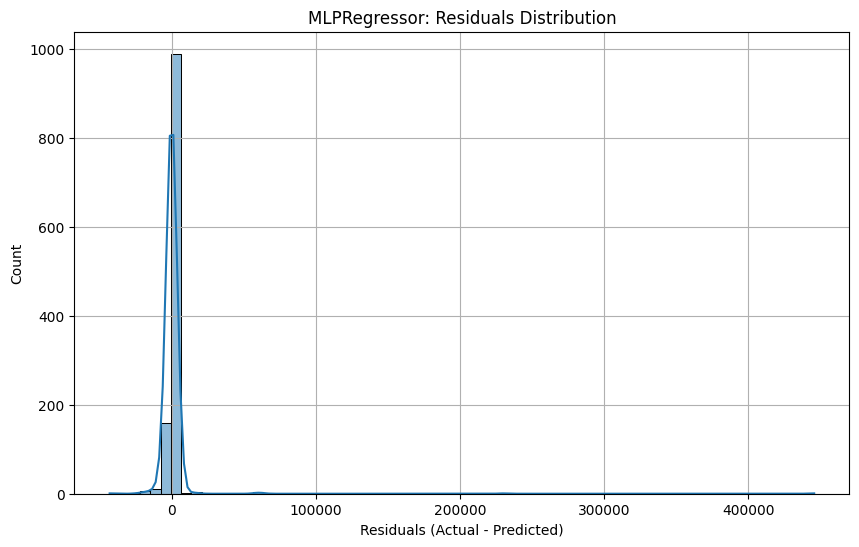

In [113]:
# Train and Evaluate MLPRegressor Model (Neural Network)

print("\n--- Training MLPRegressor (Neural Network) Model ---")
# MLPRegressor can be sensitive to hyperparameters like hidden_layer_sizes, activation, solver, and alpha.
# It requires scaled data.
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                         max_iter=500, random_state=42, early_stopping=True, n_iter_no_change=10) # Added early stopping
mlp_model.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate MLPRegressor
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"\nMLPRegressor Metrics:")
print(f"  MAE: {mae_mlp:.2f}")
print(f"  RMSE: {rmse_mlp:.2f}")
print(f"  R-squared: {r2_mlp:.4f}")

# Visualization for MLPRegressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('MLPRegressor: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_mlp, kde=True)
plt.title('MLPRegressor: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Train and Evaluate BayesianRidge Model


--- Training BayesianRidge Model ---

BayesianRidge Metrics:
  MAE: 1791.28
  RMSE: 14402.28
  R-squared: 0.4288


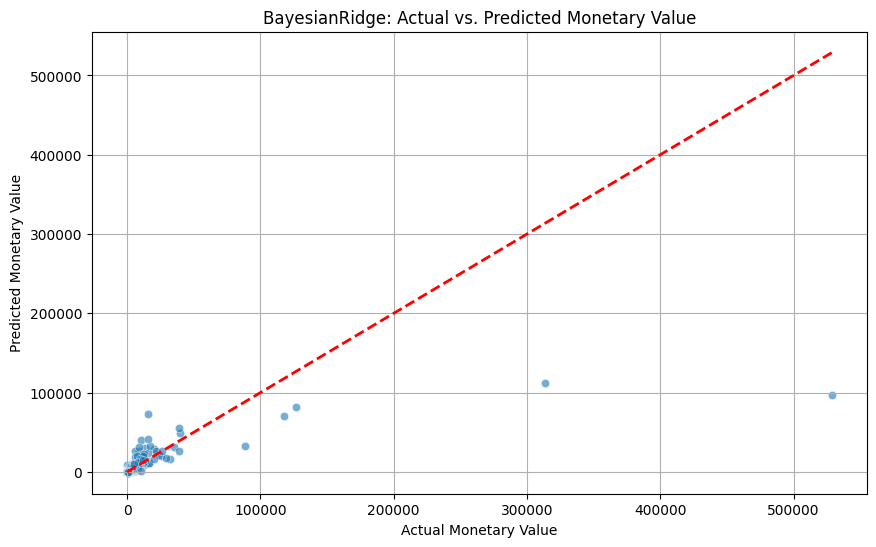

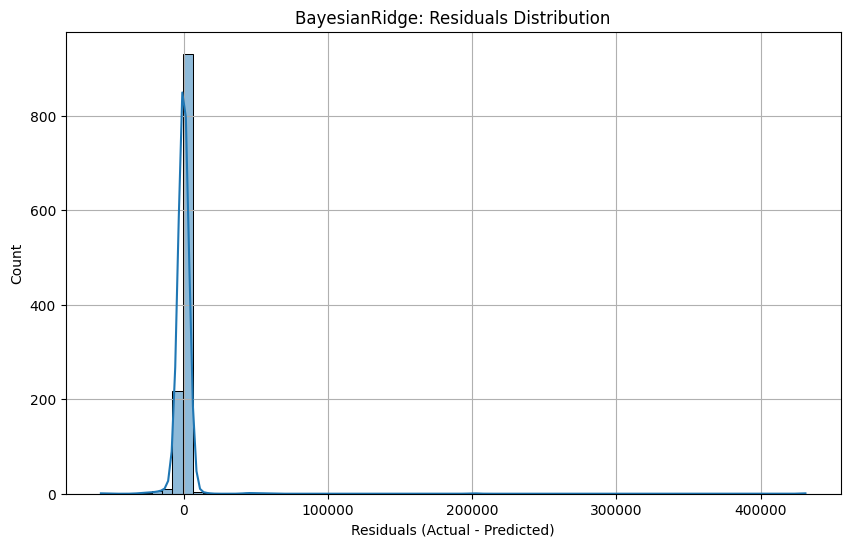

In [114]:
# Train and Evaluate BayesianRidge Model

print("\n--- Training BayesianRidge Model ---")
# BayesianRidge is a linear model but with regularization built on a probabilistic framework.
# It can be more robust to ill-posed problems than standard Linear Regression.
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train) # Use scaled data

y_pred_bayesian = bayesian_model.predict(X_test_scaled)

# Evaluate BayesianRidge
mae_bayesian = mean_absolute_error(y_test, y_pred_bayesian)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print(f"\nBayesianRidge Metrics:")
print(f"  MAE: {mae_bayesian:.2f}")
print(f"  RMSE: {rmse_bayesian:.2f}")
print(f"  R-squared: {r2_bayesian:.4f}")

# Visualization for BayesianRidge
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_bayesian, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('BayesianRidge: Actual vs. Predicted Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_bayesian, kde=True)
plt.title('BayesianRidge: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [115]:
# Cell 17: Compare Models and Select the Best One

# Create a DataFrame to summarize model performance
model_performance = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Gradient Boosting (sklearn)',
        'XGBoost',
        'LightGBM',
        'SVR',
        'K-Nearest Neighbors',
        'Decision Tree',
        'HistGradientBoosting', # New
        'MLPRegressor',         # New
        'BayesianRidge'         # New
    ],
    'MAE': [
        mae_lr, mae_rf, mae_gb, mae_xgb, mae_lgb,
        mae_svr, mae_knr, mae_dt,
        mae_hgb, mae_mlp, mae_bayesian # New
    ],
    'RMSE': [
        rmse_lr, rmse_rf, rmse_gb, rmse_xgb, rmse_lgb,
        rmse_svr, rmse_knr, rmse_dt,
        rmse_hgb, rmse_mlp, rmse_bayesian # New
    ],
    'R-squared': [
        r2_lr, r2_rf, r2_gb, r2_xgb, r2_lgb,
        r2_svr, r2_knr, r2_dt,
        r2_hgb, r2_mlp, r2_bayesian # New
    ]
})

print("--- Model Performance Comparison ---")
display(model_performance.sort_values(by='RMSE', ascending=True)) # Sort by RMSE (lower is better)

# Choose the "best" model based on your primary metric (e.g., lowest RMSE or MAE, highest R2)
# For CLTV, MAE is often preferred because it's directly interpretable in monetary terms.
best_model_name = model_performance.sort_values(by='MAE', ascending=True).iloc[0]['Model']
print(f"\nBased on MAE, the best performing model is: {best_model_name}")

# Assign the best model object
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'Gradient Boosting (sklearn)':
    best_model = gb_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model
elif best_model_name == 'LightGBM':
    best_model = lgb_model
elif best_model_name == 'SVR':
    best_model = svr_model
elif best_model_name == 'K-Nearest Neighbors':
    best_model = knr_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
elif best_model_name == 'HistGradientBoosting': # New
    best_model = hgb_model
elif best_model_name == 'MLPRegressor': # New
    best_model = mlp_model
else: # BayesianRidge (New)
    best_model = bayesian_model

print(f"Selected best model object: {best_model.__class__.__name__}")

--- Model Performance Comparison ---


,Model,MAE,RMSE,R-squared
2,Gradient Boosting (sklearn),395.446744,2736.653174,0.979376
3,XGBoost,319.790961,2787.711424,0.978599
1,Random Forest,364.650210,4928.395194,0.933112
7,Decision Tree,1441.589225,7355.175358,0.851022
8,HistGradientBoosting,863.744557,11698.453423,0.623128
4,LightGBM,924.645305,11990.916523,0.604049
0,Linear Regression,1810.075508,14379.906693,0.430559
10,BayesianRidge,1791.279921,14402.283871,0.428785
9,MLPRegressor,1584.393021,15159.797753,0.367117
6,K-Nearest Neighbors,1486.178218,16903.081669,0.213193



Based on MAE, the best performing model is: XGBoost
Selected best model object: XGBRegressor


In [116]:
# Cell 18: Save the Best Model

# Define the name of the new folder
save_folder_name = "Saving_The_Best_Model_Resources"
# Define the path to this new folder.
# '../' means go up one directory from the current notebook's location (e.g., from 'models/' to 'Project_Root/')
# Then, join with the 'save_folder_name'.
save_folder_path = os.path.join('..', save_folder_name) # Adjusted path here!

# Create the directory if it doesn't exist
os.makedirs(save_folder_path, exist_ok=True)
print(f"Ensured folder '{os.path.abspath(save_folder_path)}' exists.") # Print absolute path for clarity

# --- Manual Selection for this specific request ---
# Explicitly selecting the 'Gradient Boosting (sklearn)' model as requested.
# Make sure to run the Gradient Boosting (sklearn) training cell (Cell 8) first
# to ensure 'gb_model' is defined.
model_to_save = gb_model

# Define the file names for the model and the scaler
model_file_name = f'gradient_boosting_sklearn_model.joblib' # Specific name for clarity
scaler_file_name = 'scaler.joblib'

# Define the full paths within the new separate folder
model_file_path = os.path.join(save_folder_path, model_file_name)
scaler_file_path = os.path.join(save_folder_path, scaler_file_name)

print(f"Attempting to save the Gradient Boosting model to: {model_file_path}")

# Save the model using joblib
joblib.dump(model_to_save, model_file_path)

print(f"Gradient Boosting (sklearn) model successfully saved to '{model_file_path}'.")

print(f"Attempting to save the scaler to: {scaler_file_path}")
joblib.dump(scaler, scaler_file_path)
print(f"Scaler successfully saved to '{scaler_file_path}'.")

# Example of loading them back for future use:
# loaded_gb_model = joblib.load(model_file_path)
# loaded_scaler_for_gb = joblib.load(scaler_file_path)
# print(f"\nModel loaded back: {loaded_gb_model.__class__.__name__}, Scaler loaded back: {loaded_scaler_for_gb.__class__.__name__}")

Ensured folder 'c:\Users\aman2\OneDrive\Desktop\Git repo\Celebal-Technologies-Online-Internship-Project-\customer_lifetime_value_project\Saving_The_Best_Model_Resources' exists.
Attempting to save the Gradient Boosting model to: ..\Saving_The_Best_Model_Resources\gradient_boosting_sklearn_model.joblib
Gradient Boosting (sklearn) model successfully saved to '..\Saving_The_Best_Model_Resources\gradient_boosting_sklearn_model.joblib'.
Attempting to save the scaler to: ..\Saving_The_Best_Model_Resources\scaler.joblib
Scaler successfully saved to '..\Saving_The_Best_Model_Resources\scaler.joblib'.
